In [1]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from rlhfutils.rewards import allmathpreds, solve_expression
from rlhfutils.data import qaform
# from rlhfutils.rl_utils import load_models
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from peft import LoraConfig, get_peft_model, TaskType
import torch
from tqdm import tqdm

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
name = "../../models/rewards/bagofwords/expbow50/"
tokenizer_name = name
print("toker name is", tokenizer_name)
tokenizer = AutoTokenizer.from_pretrained(name, use_auth_token=True)
tokenizer.pad_token = tokenizer.eos_token

# peft_config = LoraConfig(
#     task_type=TaskType.SEQ_CLS,
#     inference_mode=False,
#     r=8,
#     lora_alpha=32,
#     lora_dropout=0.1,
# )
modtype =  AutoModelForSequenceClassification
model = modtype.from_pretrained(
    name, num_labels=1, torch_dtype=torch.bfloat16, device_map=7 # device_map="auto"
)
# model = get_peft_model(model, peft_config)
# model.print_trainable_parameters()

# Need to do this for gpt2, because it doesn't have an official pad token.
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.eos_token_id
model.config.use_cache = True

toker name is ../../models/rewards/bagofwords/expbow50/


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:711: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


In [27]:
logfile = pd.read_json("../../outputs/math/genouts/mathprefdata_betabig_dpo100.jsonl", lines=True,orient='records')
mean(allmathpreds(list(logfile['response'])))

3.305491829004708

In [28]:
logfile = pd.read_json("../../outputs/rollouts/math/ppo_mathnolora1b.jsonl", lines=True,orient='records')
# logfile = pd.read_json("../../outputs/rollouts/bagofwords/ppo_dporeprodactive_v5.jsonl", lines=True,orient='records')

In [29]:
logfile

,inputs,outputs,rewards,keepinds,step
0,[How can I use geospatial data to analyze patt...,[\nFed-up with the compensation for long-term ...,"[-14.875, -0.6484375, -5.0, 9.75, -5.90625, -4...","[1, 3, 5, 6, 8, 10, 12, 14, 17, 19, 21, 22, 25...",0
1,[Write a persuasive business letter in formal ...,[\nWrite an inquiry about the time you would l...,"[-14.75, 8.0, -14.375, -11.875, -14.6875, 2.40...","[1, 3, 5, 6, 8, 11, 13, 14, 16, 19, 20, 23, 25...",0
2,"[In your opinion, how might globalization and ...","[\nThis Olympic report showed that, as seen fr...","[-14.8125, -6.625, -6.34375, -10.4375, -14.875...","[1, 2, 4, 7, 9, 11, 12, 15, 17, 18, 20, 22, 25...",1
3,[Study the causes and effects of income inequa...,"[\n\nYou may access this path by submitting, s...","[-14.8125, -7.21875, -14.8125, -7.46875, 11.06...","[1, 3, 4, 7, 9, 10, 13, 15, 16, 18, 21, 23, 25...",1
4,[Write a detailed and descriptive narrative ab...,"[\nPart of your answer, this will summarize th...","[3.84375, -5.875, 7.9375, -5.21875, -7.6875, -...","[0, 2, 5, 7, 8, 11, 12, 15, 17, 19, 20, 23, 24...",2
...,...,...,...,...,...
3995,[Outline the various types and mechanisms of a...,[ This code helps you allow the user to provid...,"[14.4375, 4.53125, 4.96875, 12.9375, 4.625, -2...","[0, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 23, 25...",1997
3996,[What are some of the best hikes in Banff Nati...,"[\nTo achieve this data analysis, we have a fe...","[-2.71875, -6.3125, -5.4375, 14.9375, -4.1875,...","[0, 3, 5, 6, 9, 10, 13, 14, 17, 18, 21, 22, 24...",1998
3997,[- The system should send booking confirmation...,[\n- The first step for the user can understan...,"[-1.1328125, 11.375, -8.5625, 11.625, 7.09375,...","[1, 3, 5, 6, 9, 11, 12, 15, 16, 18, 20, 23, 25...",1998
3998,"[In your own words, provide a detailed explana...","[\nIn order to create a safe, safe and easy to...","[11.3125, 10.125, 14.3125, -4.125, -5.625, -3....","[0, 2, 5, 7, 8, 10, 13, 15, 17, 19, 21, 22, 25...",1999


In [15]:
logfile['golds'] = [allmathpreds([t['inputs'][i]+t['outputs'][i] for i in range(len(t['inputs']))]) for ind, t in logfile.iterrows()]

In [20]:
gs = list(logfile['golds'])

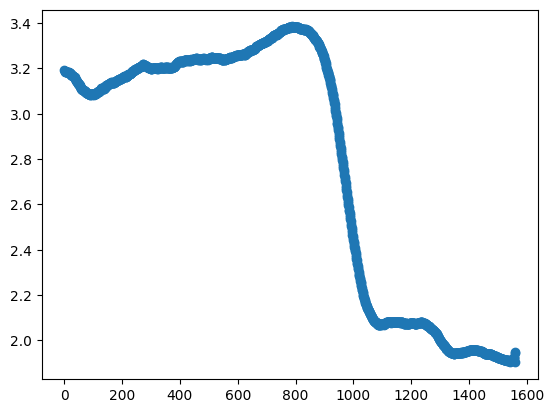

In [24]:
plt.scatter(range(len(logfile)-1), [mean([mean(gs[j]) for j in range(i, min(i+100, len(logfile)-1))]) for i in range(len(logfile)-1)])

In [ ]:
logfile = pd.read_json("../../../active-rlhf/outputs/results/rollouts/bagofwords/", lines=True,orient='records')
logfile['golds'] = [allmathpreds(t) for t in logfile['texts']]

In [31]:
def scoouts(md, tk, inps):
    invals = tk(inps, return_tensors="pt", padding=True, truncation=True).to(md.device)
    socs = md(**invals)
    return socs.logits.tolist()

In [37]:
r = logfile.loc[200]
print(r['rewards'])
scoouts(model, tokenizer, [qaform(r['inputs'][i].strip(), r['outputs'][i].strip()) for i in range(len(r['inputs']))])

[2.25, -5.0, 10.6875, 8.4375, 8.5, 12.0625, -10.1875, 2.75, -8.125, 11.0, 6.78125, -3.90625, 1.8515625, 8.8125, 2.90625, 9.5625, 10.0, 10.5, 11.25, -1.65625, -2.375, 8.4375, 4.75, 13.875, 7.53125, 12.0625, 13.5625, 13.25, 10.0, 11.0625, 11.5625, 2.234375]


[[10.75],
 [4.0625],
 [14.0625],
 [13.375],
 [13.8125],
 [14.25],
 [-4.8125],
 [12.875],
 [-3.796875],
 [13.5625],
 [13.3125],
 [7.78125],
 [12.5625],
 [13.625],
 [12.0625],
 [13.375],
 [14.25],
 [14.0],
 [14.375],
 [8.0625],
 [7.84375],
 [13.6875],
 [12.3125],
 [14.3125],
 [13.3125],
 [13.875],
 [14.625],
 [14.625],
 [13.6875],
 [14.1875],
 [14.1875],
 [12.1875]]

In [5]:
def intacc(df, inte=0, lim=100):
    gtmp = list(df.golds[inte:inte+lim])
    rtmp = list(df.rewards[inte:inte+lim])
    corr = 0
    #print(len(gtmp))
    #range(len(gtmp))
    for i in range(len(gtmp)):
        if (gtmp[i][0]>gtmp[i][1])==(rtmp[i][0]>rtmp[i][1]):
            corr+=1
    return corr/lim

def rwmean(df, inte=0, lim=100):
    gtmp = list(df.rewards[inte:inte+lim])
    gtmp = [g[0] for g in gtmp] + [g[1] for g in gtmp]
    return mean(gtmp)
    
def rmean(df, inte=0, lim=100):
    gtmp = list(df.golds[inte:inte+lim])
    gtmp = [g[0] for g in gtmp] + [g[1] for g in gtmp]
    return mean(gtmp)
    
def corr(df, inte=0, lim=100):
    gtmp = list(df.golds[inte:inte+lim])
    gtmp = [g[0] for g in gtmp] + [g[1] for g in gtmp]
    rtmp = list(df.rewards[inte:inte+lim])
    rtmp = [g[0] for g in rtmp] + [g[1] for g in rtmp]
    return spearmanr(gtmp, rtmp).statistic

In [6]:
def pfunct(df, lim, fct):
    vals = []
    x = []
    for i in range(len(df)): 
        x.append(i)
        vals.append(fct(df, i, lim))
    plt.scatter(x, vals)

In [7]:
# some code to analyze the types of errors generated by the math model (based on guesses, TODO look at some outputs if we don't see
# something clearcut here)
def analyze_errors(pred):
    preds = pred.replace("Question:", "").replace("\n\nAnswer:", "").replace(" ", "").split("=")
    golds = solve_expression(pred.split("=")[0].replace("Question:", "").replace(" ", ""))
    
    errors = {"weird_characters": 0, "incorrect_values": 0, "incorrect_symbols": 0, "bracket_mismatch": 0}

    for pred, gold in zip(preds, golds):
        

        # A. Check for weird characters
        if re.search(r"[^0-9+\-*/\s()]", pred):
            errors["weird_characters"] += 1

        # B. Check if symbols are correct but values are incorrect (assuming structure is correct for simplicity)
        pred_symbols = re.sub(r"[0-9]", "", pred)
        gold_symbols = re.sub(r"[0-9]", "", gold)
        if pred_symbols == gold_symbols and pred != gold:
            errors["incorrect_values"] += 1

        # C. Incorrect symbols
        if pred_symbols != gold_symbols:
            errors["incorrect_symbols"] += 1

        # D. Incorrect number of open/close brackets
        if pred.count("(") != pred.count(")") or gold.count("(") != gold.count(")"):
            errors["bracket_mismatch"] += 1
    
    return errors

In [8]:
def agg_row(rw):
    vals = list([analyze_errors(r) for r in rw])
    return {k:mean([vals[i][k] for i in range(len(vals))]) for k in vals[0].keys()}

def mn_scat(indf, val, inte):
    nv = []
    for i in range(len(indf)-inte):
        nv.append(mean(indf[val][i:i+inte]))
    return plt.scatter(range(len(nv)), nv)

In [31]:
dvals = pd.DataFrame([agg_row(r) for r in logfile['texts']])

In [42]:
dvals.keys()

Index(['weird_characters', 'incorrect_values', 'incorrect_symbols',
       'bracket_mismatch'],
      dtype='object')

In [48]:
len(logfile)

24992

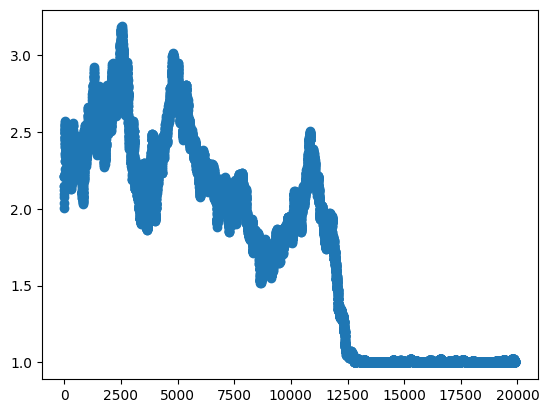

In [62]:
mn_scat(dvals[:20000], 'incorrect_symbols', 100)

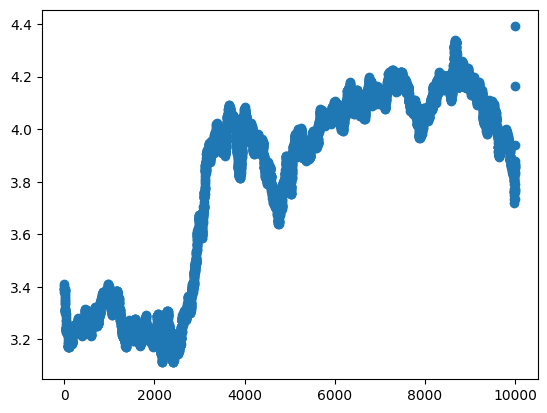

In [51]:
pfunct(logfile[:10000], 100, rmean)

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


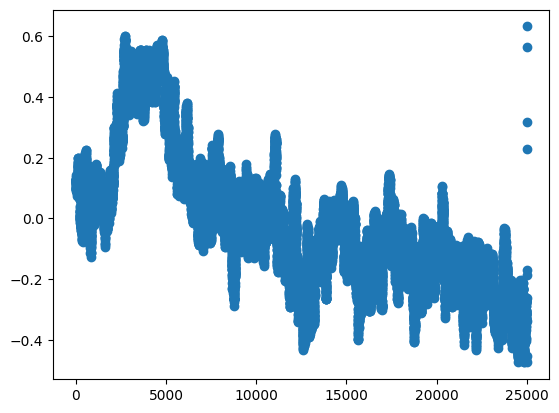

In [19]:
pfunct(logfile, 100, corr)